In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 

import seaborn as sns
import numpy as np

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

In [6]:
# напишите запрос
query = '''
SELECT CAST(DATE_TRUNC('month', creation_date) AS date) AS month_date,
       SUM(views_count) AS total_views
FROM stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-01-01' AND '2008-12-31'
GROUP BY CAST(DATE_TRUNC('month', creation_date) AS date)
ORDER BY total_views DESC
'''

# выполните запрос

In [7]:
posts_sum = pd.read_sql_query(query, con=engine) 
display(posts_sum)

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

* Из таблицы мы видим, что наибольшее число просмотров наблюдалось в сентябре. Далее, с возрастанием месяца - число просмотров снижалось. Самое низкое число просмотров наблюдалось в летнее время (июль и август). Скорее всего это связано с отпусками у специалистов IT профессий, которые чаще всего пользуются сервисом stackoverflow, а так же с каникулами у студентов IT специальностей, которые так же используют stackoverflow. 
* К новому году число просмотров снижалось, вероятно, в связи с тем, что все вспомнили как программировать после отпусков и каникул и им нужно реже искать ответы на свои вопросы. 
* Сентрябрь - месяц сложный. В июле - все отдыхают. Жарко.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

In [8]:
# напишите запрос
query = '''
SELECT display_name,
       COUNT(DISTINCT(user_id))
FROM stackoverflow.users u
JOIN stackoverflow.posts p ON u.id=p.user_id
JOIN stackoverflow.post_types t ON p.post_type_id=t.id
WHERE (DATE_TRUNC('day', p.creation_date) <= DATE_TRUNC('day', u.creation_date) + INTERVAL '1 month') AND (p.post_type_id=2)
GROUP BY display_name
HAVING COUNT(p.id) > 100
'''

# выполните запрос

In [9]:
posts_users = pd.read_sql_query(query, con=engine) 
display(posts_users)

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


In [10]:
#выведем ещё 10 случайных строк из полученной таблицы
posts_users.sample(10)

,display_name,count
41,Mark,17
74,lomaxx,1
12,Craig,10
28,Johannes Schaub - litb,1
68,anjanb,1
64,Tom,19
50,Nick,16
29,John Millikin,1
26,Joe,9
35,Kevin,11


* По полученным таблицам мы видим, что число уникальных user_id иногда имеет более 1 значения для 1 пользователя. Это странно. По определению:
* **User ID** – это уникальный номер, который присваивается пользователю и позволяет анонимно идентифицировать его на разных устройствах или на протяжении нескольких сеансов [https://developers.google.com/analytics/devguides/collection/analyticsjs/user-id?hl=ru], что, в нашем случае - не соответствует действительности. 
* Есть несколько вариантов того, почему так получилось: 
1. Например, проведённая настройка присваивания USER_ID каждому уникальному пользователю дала сбой или была проведена с нарушениями. 
2. Настройка клиента была произведена таким образом, что при посещении пользователем сайта с разных устройств - каждый раз происходит присваивание нового uid.
3. Возможное предположение - некоторые пользователи просто имеют одинаковые имена, но, соответственно разные uid.

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

In [11]:
# напишите запрос
query = '''
WITH
i AS (
SELECT u.id
FROM stackoverflow.users u 
JOIN stackoverflow.posts p ON u.id=p.user_id
WHERE (u.creation_date::date BETWEEN '2008-09-01' AND '2008-09-30') 
AND (p.creation_date::date BETWEEN '2008-12-01' AND '2008-12-31')
GROUP BY u.id
      )

SELECT CAST(DATE_TRUNC('month', p.creation_date) AS date) AS month,
       COUNT(p.id) AS count
FROM stackoverflow.users u 
JOIN stackoverflow.posts p ON u.id=p.user_id
WHERE (p.creation_date::date BETWEEN '2008-01-01' AND '2008-12-31')
AND p.user_id IN (SELECT * FROM i)
GROUP BY CAST(DATE_TRUNC('month', p.creation_date) AS date)
ORDER BY CAST(DATE_TRUNC('month', p.creation_date) AS date) DESC
'''

# выполните запрос

In [12]:
posts_month = pd.read_sql_query(query, con=engine) 
display(posts_month)

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


По нашему запросу, в таблицу должны были попасть данные только о тех пользователях, которые пришли в систему начиная с 1 сентября 2008 года. А мы видим 32 поста этих пользователей за август. Такого быть не должно. Следовательно - имеется какая-то техническая ошибка, которая присвоила 32 постам не верную (августовскую) дату публикации. 

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

In [13]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id
                              ORDER BY creation_date) AS cumulative_count
FROM stackoverflow.posts
ORDER BY user_id,
         creation_date
'''

# выполните запрос

In [14]:
posts_review = pd.read_sql_query(query, con=engine) 
display(posts_review)

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


        * Каких-то очевидных анамалий в этой таблице нет.

# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

In [15]:
# напишите запрос
query = '''
WITH sample_final AS
  (WITH sample AS
     (SELECT id post_id,
             user_id,
             date_trunc('day', creation_date)::date dt
      FROM stackoverflow.posts
      WHERE date_trunc('month', creation_date)::date = '2008-08-01' ) SELECT dt,
                                                                             count(post_id),
                                                                             user_id
   FROM sample
   GROUP BY dt,
            user_id)
SELECT user_id,
       AVG(COUNT) as avg_daily
FROM sample_final
GROUP BY user_id
HAVING user_id in
  (WITH DATA AS
     (SELECT id post_id,
             user_id
      FROM stackoverflow.posts
      WHERE date_trunc('month', creation_date)::date = '2008-08-01' ) SELECT user_id
   FROM DATA
   GROUP BY user_id
   HAVING count(post_id) > 120)
ORDER BY avg_daily
'''

#

In [16]:
posts_avg = pd.read_sql_query(query, con=engine) 
display(posts_avg)

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


            Критических замечаний к полученой таблице нет.

# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

In [17]:
# напишите запрос
query = '''
SELECT ROUND(CAST (COUNT(dt) AS NUMERIC) / COUNT(DISTINCT (user_id))) RESULT
FROM
  (WITH data AS
     (SELECT DATE_TRUNC('DAY', creation_date)::DATE dt,
             user_id
      FROM stackoverflow.posts
      WHERE (DATE_TRUNC('day', creation_date)::DATE BETWEEN '2008-12-01' AND '2008-12-07') ) SELECT DISTINCT(dt),
                                                                                                    user_id
   FROM data
   GROUP BY user_id,
            dt) AS final_data
'''

# выполните запрос

In [18]:
duration = pd.read_sql_query(query, con=engine) 
display(duration)

,result
0,2.0


В среднем, пользователи в указанный период взаимодействовали с платформой всего 2 дня. 

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

In [19]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date,
       TO_CHAR (DATE_TRUNC('month', LAG(creation_date, 2, NULL) OVER (PARTITION BY user_id ORDER BY creation_date)), 'Month') second_last_month
FROM stackoverflow.posts
ORDER BY user_id, creation_date
'''

# выполните запрос

In [20]:
activity = pd.read_sql_query(query, con=engine) 
display(activity)

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


                Ошибок в таблице по первой проверке не обнаружено.

# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

In [21]:
# напишите запрос
query = '''
WITH profile AS
  (SELECT id AS user_id,
          DATE_TRUNC('month', T.start_dt) AS dt,
          COUNT(*) OVER (PARTITION BY DATE_TRUNC('month', T.start_dt)) AS cohort_users_cnt
   FROM
     (SELECT u1.id,
             DATE_TRUNC('month', p1.creation_date) AS creation_date,
             MIN(p1.creation_date) OVER (PARTITION BY u1.id
                                         ORDER BY p1.creation_date) AS start_dt
      FROM stackoverflow.users u1
      JOIN stackoverflow.posts p1 ON u1.id = p1.user_id) T
   GROUP BY id,
            dt),
sessions AS
  (SELECT user_id,
          DATE_TRUNC('month', creation_date) AS session_dt
   FROM stackoverflow.posts
   GROUP BY user_id,
            session_dt)
SELECT p.dt AS cohort_dt,
       s.session_dt,
       COUNT(p.user_id) AS users_cnt,
       p.cohort_users_cnt,
       ROUND(COUNT(p.user_id) * 100.0 / cohort_users_cnt, 2) AS retention_rate
FROM profile p
JOIN sessions s ON p.user_id = s.user_id
GROUP BY 1,
         2,
         4
'''

# выполните запрос

In [22]:
retention_rate = pd.read_sql_query(query, con=engine) 
display(retention_rate)

,cohort_dt,session_dt,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

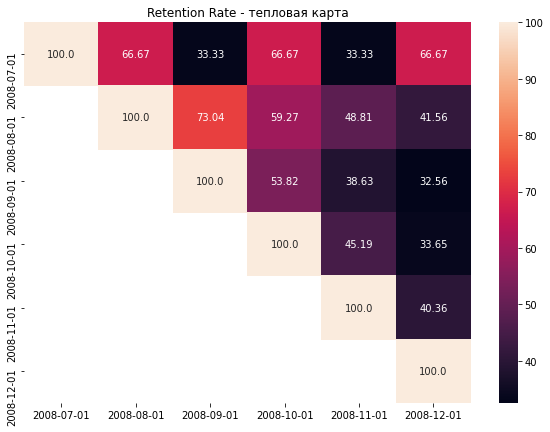

In [23]:
# постройте тепловую карту Retention Rate

retention = retention_rate.pivot('cohort_dt', 'session_dt', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]


plt.figure(figsize=(10, 7)) 
sns.heatmap(retention, 
            annot=True, 
            fmt='') 
plt.title('Retention Rate - тепловая карта') 
plt.show() 

* Вспомним определение **Retention Rate (RR)** - это коэффициент удержания пользователей. Он показывает, сколько клиентов возвращается в приложение в определённый период после установки. Метрика retention rate рассчитывается как отношение вернувшихся в приложение пользователей к числу установивших его в определённую дату.
* **Правило:** RR со временем может только падать, возрасти, особенно по сравнению с 1 днем (установка и использование приложения) - оно не может. 
* **Описание полученной тепловой карты:**
    Видим странную тенденцию то возрастания до 66% то снижения до 33% удержания у пользователей, относящихся к июньской когорте. Такого быть не должно. В данной когорте всего 3 человека, поэтому, RR этой когорты лучше не рассматривать. 
    В остальных когортах RR постепенно снижается, что является адекватным проявлением функции RR. 
    Самый высокий показатель удержания 2 дня наблюдался у когорты пользователей, зарегестрированных в августе (73%). Самый низкий процент удержания 2 дня у когорты пользователей от ноября.
    В целом видно, что чем позже пользователи регестрировались на платформе, тем хуже у них удержание (второго, третьего дня), по сравнению с пользователями от августа, сентября.
   
    

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

In [24]:
# напишите запрос
query = '''
WITH data AS
  (SELECT to_char(creation_date, 'MM') creation_date,
          count(id) posts_count
   FROM stackoverflow.posts
   GROUP BY to_char(creation_date, 'MM')
   HAVING to_char(creation_date, 'MM') BETWEEN '09' AND '12')
SELECT *,
       ROUND(CAST((posts_count - LAG(posts_count, 1, NULL) OVER (
                                                                 ORDER BY creation_date)) AS numeric) / (LAG(posts_count, 1, NULL) OVER (
                                                                                                                                         ORDER BY creation_date)) *100, 2) percentage
FROM data
'''

# выполните запрос

In [25]:
percentage = pd.read_sql_query(query, con=engine) 
display(percentage)

,creation_date,posts_count,percentage
0,09,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

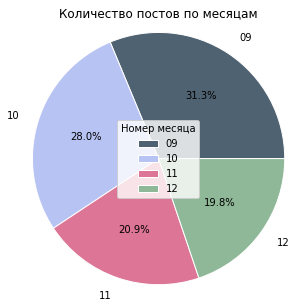

In [26]:
plt.rcParams["figure.figsize"] = (5,5)
names = percentage['creation_date']
values = percentage['posts_count']

colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']


plt.title("Количество постов по месяцам")
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors, autopct='%1.1f%%');
plt.legend(title="Номер месяца", loc="center")
plt.axis('equal')
plt.show();

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

In [27]:
# напишите запрос
query = '''
WITH data AS
  (SELECT to_char(creation_date, 'ww') week_creation,
          creation_date
   FROM stackoverflow.posts
   WHERE DATE_TRUNC('month', creation_date)='2008-10-01'
     AND user_id in
       (SELECT user_id
        FROM stackoverflow.posts
        GROUP BY user_id
        ORDER BY count(id) DESC
        LIMIT 1) )
SELECT DISTINCT week_creation,
                MAX(creation_date) OVER (PARTITION BY week_creation
                                                ORDER BY week_creation) as creation_date
FROM data
ORDER BY week_creation

'''

# выполните запрос

In [28]:
creation_date = pd.read_sql_query(query, con=engine) 
display(creation_date)

,week_creation,creation_date
0,40,2008-10-06 21:35:00
1,41,2008-10-13 18:44:22
2,42,2008-10-20 20:57:36
3,43,2008-10-27 23:02:02
4,44,2008-10-31 22:16:01


        Каких-то серьёзных ошибок в таблице нет. 